The given data is partitioned in 3 parts of 10 attributes each. The attributes are :

1. Radius
2. Texture
3. Perimeter
4. Area
5. Smoothness
6. Compactness
7. Concavity
8. Concave Points
9. Symmetry
10. Fractal dimension

Each feature has measurments for its mean, standard error, and worst measurments.
Worst measurments means the farthest from the mean 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix # plotting confusion matrix 
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [2]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.shape

(569, 33)

Dropping the "id " and "Unnamed 32" column. 

In [5]:
data=data.drop(["id","Unnamed: 32"],axis=1)

In [6]:
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.shape 

(569, 31)

import matplotlib.pyplot as plt
corr = data[means_data].corr()
plt.figure(figsize=(10,8))
plt.title("Correlation between Each Parameters")
sns.heatmap(corr,cbar=True, annot = True, fmt='.4f', xticklabels=means, yticklabels=means, cmap="viridis")


In [8]:
data["diagnosis"]=data["diagnosis"].map({'B':0,'M':1}).astype(int)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
means_data= list(data.columns[1:11])
errors_data= list(data.columns[11:21])
worsts_data= list(data.columns[21:])


<AxesSubplot:title={'center':'Correlation between Each Parameters'}>

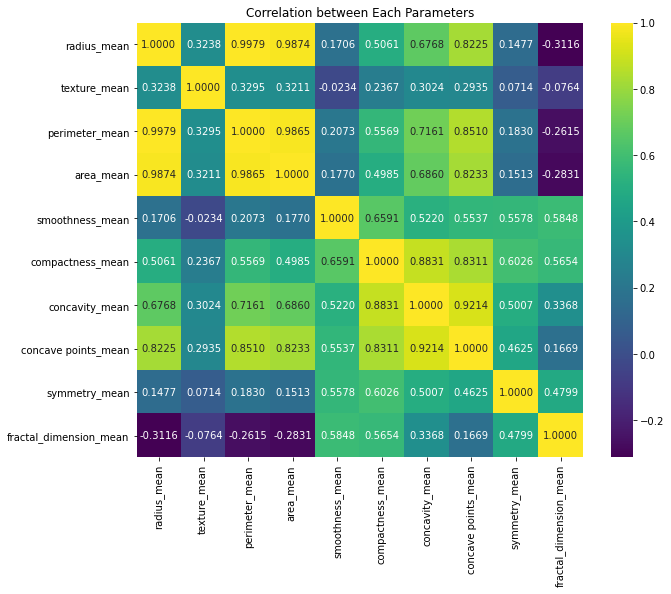

In [10]:
import matplotlib.pyplot as plt
corr = data[means_data].corr()
plt.figure(figsize=(10,8))
plt.title("Correlation between Each Parameters")
sns.heatmap(corr,cbar=True, annot = True, fmt='.4f', xticklabels=means_data, yticklabels=means_data, cmap="viridis")


From heatmap above, we observe that there are 6 sets of parameters that are highly correlated to each other: 
1. Radius and Perimeter 
2. Radius and area 
3. Parimeter and area 
4. Concavity and Concave points 
5. Compactness and concavity 
6. Compactness and concave points
However, since the correlation between compactness and concavity and the correlation between conpactness and concave points are below 0.9, we decided to keep both of the parameters. 

Since Parameter and area are both correlated to radius. we choose radius. From the set of Cancavity and Concave points, we choose concavity

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x=data[['radius_mean','compactness_mean',"smoothness_mean","texture_mean", "symmetry_mean","concavity_mean","fractal_dimension_mean"]]
y=data[['diagnosis']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)
#here we set the training data set to be 80% of the data and 20% to be the test set 

print(y_test)


     diagnosis
352          1
20           0
484          0
1            1
472          0
..         ...
111          0
463          0
538          0
183          0
359          0

[114 rows x 1 columns]


In [13]:
print(x_test.columns)

Index(['radius_mean', 'compactness_mean', 'smoothness_mean', 'texture_mean',
       'symmetry_mean', 'concavity_mean', 'fractal_dimension_mean'],
      dtype='object')


In [14]:
K_neighbors = 10
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='uniform')
clf.fit(x_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [15]:
print(clf.classes_, clf.effective_metric_, clf.n_samples_fit_)

[0 1] euclidean 455


In [16]:
y_test_predicted = clf.predict(x_test)
y_test_probabilities = clf.predict_proba(x_test)
mean_accuracy = clf.score(x_test, y_test)

print("Predicted Results", y_test_predicted)
print("KNN probability of belonging to class",y_test_probabilities)
print("Mean accuracy of prediction", mean_accuracy)



Predicted Results [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0]
KNN probability of belonging to class [[0.  1. ]
 [0.9 0.1]
 [0.9 0.1]
 [0.  1. ]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.  1. ]
 [0.5 0.5]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.9 0.1]
 [0.5 0.5]
 [1.  0. ]
 [0.9 0.1]
 [0.2 0.8]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.5 0.5]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.3 0.7]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.6 0.4]
 [0.6 0.4]
 [0.  1. ]
 [0.7 0